# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import openweather api
import openweathermapy.core as owm

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations. original 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

# Initialize column lists
city_name = []          
cloudiness = []   
country = []       
date = []          
humidity = []      
lat = []           
lng = []           
max_temp = []     
wind_speed = []

# iteration counter
i = 0
# set counter
set_no = 1

# openweatherapi free account allow 60 api queries per minute. Set the maximum number to 58 to be safe
query_per_min = 58
query_no = 1

print('Beginning Data Retrieval \n -----------------------------')
for city in cities:
    
    try:
        
        # Get data from the API
        current_weather = owm.get_current(city, **settings)
        summary = ["name", "clouds.all", "sys.country", "dt", "main.humidity", "main.temp_max", "coord.lat", "coord.lon", "wind.speed"]
        data = current_weather(*summary)
        
        # Print Status
        print(f'Processing Record {i+1} of Set {set_no} | {data[0]}')
        
        # Store in lists
        city_name.append(data[0])          
        cloudiness.append(data[1])
        country.append(data[2])  
        date.append(data[3])     
        humidity.append(data[4])
        max_temp.append(data[5])
        lat.append(data[6])    
        lng.append(data[7])
        wind_speed.append(data[8])
            
        # Increase counters
        i = i+1
        query_no = query_no + 1
        
    except: 
        print(f'City not found. Skipping...')
        query_no = query_no + 1

    # Start next set
    if query_no == query_per_min:
        
         # counter reset
        i = 0
        query_no = 0
        
        # Increase set counter
        set_no = set_no +1
        
        # Sleep for 70 seconds after each set
        time.sleep(70)
    
print('----------------------------- \n Data Retrieval Complete \n -----------------------------')

Beginning Data Retrieval 
 -----------------------------
Processing Record 1 of Set 1 | Kapaa
City not found. Skipping...
Processing Record 2 of Set 1 | Batagay-Alyta
Processing Record 3 of Set 1 | Conceicao da Barra
Processing Record 4 of Set 1 | Faya
Processing Record 5 of Set 1 | Funadhoo
Processing Record 6 of Set 1 | Venado
Processing Record 7 of Set 1 | Port Hedland
Processing Record 8 of Set 1 | Bluff
City not found. Skipping...
Processing Record 9 of Set 1 | Grindavik
Processing Record 10 of Set 1 | Ushuaia
Processing Record 11 of Set 1 | Pevek
Processing Record 12 of Set 1 | Baruun-Urt
Processing Record 13 of Set 1 | Alofi
Processing Record 14 of Set 1 | Port Blair
Processing Record 15 of Set 1 | Castro
Processing Record 16 of Set 1 | Guerrero Negro
Processing Record 17 of Set 1 | Taoudenni
Processing Record 18 of Set 1 | Awbari
Processing Record 19 of Set 1 | Kununurra
Processing Record 20 of Set 1 | Abha
Processing Record 21 of Set 1 | Albany
Processing Record 22 of Set 1 | 

Processing Record 30 of Set 4 | Outjo
Processing Record 31 of Set 4 | Sterling
Processing Record 32 of Set 4 | Maldonado
Processing Record 33 of Set 4 | Butaritari
Processing Record 34 of Set 4 | Sal Rei
Processing Record 35 of Set 4 | Lebu
Processing Record 36 of Set 4 | Rosita
Processing Record 37 of Set 4 | Dikson
City not found. Skipping...
Processing Record 38 of Set 4 | Grand Gaube
Processing Record 39 of Set 4 | Bitung
City not found. Skipping...
Processing Record 40 of Set 4 | Halifax
City not found. Skipping...
Processing Record 41 of Set 4 | Khatima
Processing Record 42 of Set 4 | Sovetskiy
Processing Record 43 of Set 4 | Matay
City not found. Skipping...
Processing Record 44 of Set 4 | Takoradi
City not found. Skipping...
Processing Record 45 of Set 4 | Hamilton
Processing Record 46 of Set 4 | Khatanga
Processing Record 47 of Set 4 | Los Llanos de Aridane
Processing Record 48 of Set 4 | Olinda
Processing Record 49 of Set 4 | Falmouth
Processing Record 50 of Set 4 | Rocha
Pro

Processing Record 10 of Set 8 | Jumla
Processing Record 11 of Set 8 | Tambilil
Processing Record 12 of Set 8 | Broome
Processing Record 13 of Set 8 | Fare
Processing Record 14 of Set 8 | San Ramon
Processing Record 15 of Set 8 | Auki
Processing Record 16 of Set 8 | Dashitou
Processing Record 17 of Set 8 | Marzuq
Processing Record 18 of Set 8 | Marasu
Processing Record 19 of Set 8 | Oussouye
Processing Record 20 of Set 8 | Weihai
Processing Record 21 of Set 8 | Hailey
Processing Record 22 of Set 8 | Terney
Processing Record 23 of Set 8 | Lima
City not found. Skipping...
Processing Record 24 of Set 8 | Chepareria
Processing Record 25 of Set 8 | Tessalit
Processing Record 26 of Set 8 | Illela
Processing Record 27 of Set 8 | Gazanjyk
Processing Record 28 of Set 8 | Uglovskoye
Processing Record 29 of Set 8 | Vitim
Processing Record 30 of Set 8 | Mandurah
Processing Record 31 of Set 8 | Alugan
City not found. Skipping...
Processing Record 32 of Set 8 | Henties Bay
Processing Record 33 of Set

Processing Record 36 of Set 11 | Salmo
Processing Record 37 of Set 11 | Lithakia
Processing Record 38 of Set 11 | Key Largo
City not found. Skipping...
Processing Record 39 of Set 11 | Dehloran
Processing Record 40 of Set 11 | Poum
Processing Record 41 of Set 11 | Quelimane
Processing Record 42 of Set 11 | Oyek
Processing Record 43 of Set 11 | Les Cayes
Processing Record 44 of Set 11 | Nalut
Processing Record 45 of Set 11 | Medvedka
Processing Record 46 of Set 11 | Celestun
Processing Record 47 of Set 11 | Bayeux
City not found. Skipping...
Processing Record 48 of Set 11 | San Patricio
Processing Record 49 of Set 11 | Huai Thalaeng
City not found. Skipping...
Processing Record 50 of Set 11 | Nueva Concepcion
----------------------------- 
 Data Retrieval Complete 
 -----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
# Create data frame
weather_df = pd.DataFrame({"City": city_name, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity,
                           "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed})

# Clean up
weather_df = weather_df.dropna(how='any')

# How row count
weather_df.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [43]:
weather_df.to_csv("output/weather_data.csv", encoding="utf-8", index=False, header=True)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kapaa,1,US,1547348160,68,22.08,-159.32,78.98,5.82
1,Batagay-Alyta,20,RU,1547350745,0,67.80,130.41,-36.19,4.05
2,Conceicao da Barra,88,BR,1547350800,94,-18.59,-39.73,79.02,9.08
3,Faya,0,SA,1547348400,87,18.39,42.45,53.60,9.17
4,Funadhoo,0,MV,1547350800,100,6.15,73.27,81.81,8.86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [44]:
# Get today's date to put in plot titles
now = datetime.datetime.now()
today = now.strftime("%m/%d/%Y")

# Define plot parameters to use in all plot
size = 40
marker_shape = "o" 
color = "#045FB4"
edge_color = "black"
line_width = 1
alpha_value = 0.7

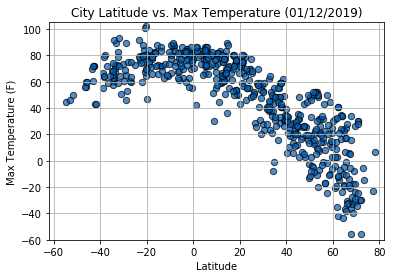

In [45]:
# Define axes
x_lat = weather_df['Lat']
y_max_temp = weather_df['Max Temp']

# Build the scatter plots 
plt.scatter(x_lat, y_max_temp, s=size, marker=marker_shape, facecolors=color, edgecolors=edge_color, linewidth=line_width, alpha=alpha_value)

# Incorporate the other graph properties
plt.xlim(-62, 82)
plt.ylim(-60, 105) # The start point of y-axes I set is different from the expected result (-20) since if I set it to -20, lots of data dots will be missing
plt.grid()
plt.title(f'City Latitude vs. Max Temperature ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save Figure
plt.savefig("images/Lat_vs_MaxTemp_Plot.png", bbox_inches="tight")

#### Latitude vs. Humidity Plot

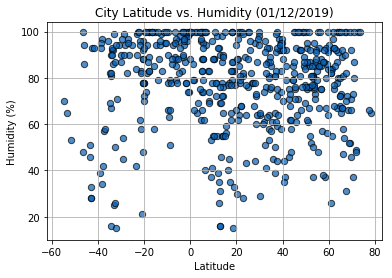

In [46]:
# Define axes
x_lat = weather_df['Lat']
y_humidity = weather_df['Humidity']

# Build the scatter plots 
plt.scatter(x_lat, y_humidity, s=size, marker=marker_shape, facecolors=color, edgecolors=edge_color, linewidth=line_width, alpha=alpha_value)

# Incorporate the other graph properties
plt.xlim(-62, 83)
plt.ylim(10, 104)
plt.grid()
plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save Figure
plt.savefig("images/Lat_vs_Humidity_Plot.png", bbox_inches="tight")

#### Latitude vs. Cloudiness Plot

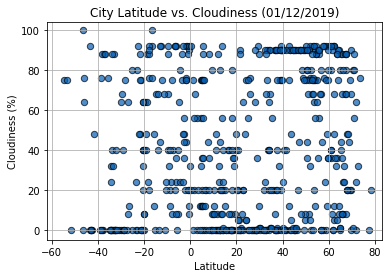

In [47]:
# Defind axes
x_lat = weather_df['Lat']
y_cloudiness = weather_df['Cloudiness']

# Build the scatter plots for each city types
plt.scatter(x_lat, y_cloudiness, s=size, marker=marker_shape, facecolors=color, edgecolors=edge_color, linewidth=line_width, alpha=alpha_value)

# Incorporate the other graph properties
plt.xlim(-62, 83)
plt.ylim(-5, 104)
plt.grid()
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save Figure
plt.savefig("images/Lat_vs_Cloudiness_Plot.png", bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

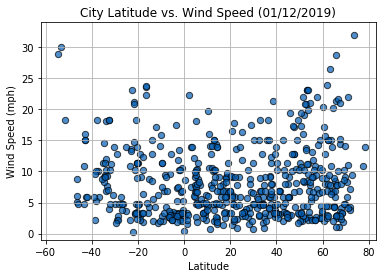

In [48]:
# Defind axes
x_lat = weather_df['Lat']
y_wind = weather_df['Wind Speed']

# Build the scatter plots for each city types
plt.scatter(x_lat, y_wind, s=size, marker=marker_shape, facecolors=color, edgecolors=edge_color, linewidth=line_width, alpha=alpha_value)

# Incorporate the other graph properties
plt.xlim(-62, 83)
plt.ylim(-1, 34)
plt.grid()
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save Figure
plt.savefig("images/Lat_vs_Wind_Speed_Plot.png", bbox_inches="tight")